In [7]:
import numpy as np
import pandas as pd

# 쥬피터와 DataFrame의 출력을 소수점 이하 3자리로 제한
%precision 3
pd.set_option("display.precision", 3)

df = pd.read_csv("../data/ch2_scores_em.csv", index_col="student number")

en_scores = np.array(df["english"])[:10]
ma_scores = np.array(df["mathematics"])[:10]

scores_df = pd.DataFrame({"english": en_scores, "mathematics": ma_scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name="student"))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [8]:
import matplotlib.pyplot as plt

#matplotlib inline

# 2차원 데이터의 시각화
2차원 데이터를 그릴 때는 산점도가 매우 편리하다.

## 3.2.1 산점도

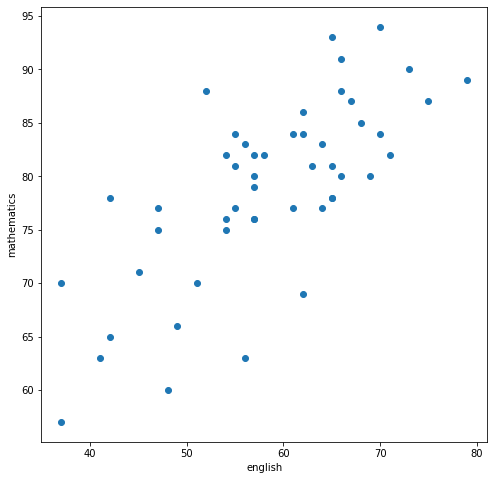

In [9]:
en_scores = np.array(df["english"])
ma_scores = np.array(df["mathematics"])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

# 산점도
ax.scatter(en_scores, ma_scores)
ax.set_xlabel("english")
ax.set_ylabel("mathematics")

plt.show()

# 산점도를 통해 영어 점수가 높은 사람일수록 수학 점수도 높은 경향이 있따는 것을 알 수 있다.

## 3.2.2 회귀직선(regression line)

회귀직선은 두 데이터 사이의 관계를 더욱 잘 나타내는 직선이다.

matplotlib에는 회귀직선을 직접 그리는 메서드가 없으므로 np.polyfit 함수와 np.poly1d 함수를 사용하여 영어 점수를 x, 수학 점수를 y로 했을 때 회귀직선 y = B_0 +b_1x를 구할 수 있다.

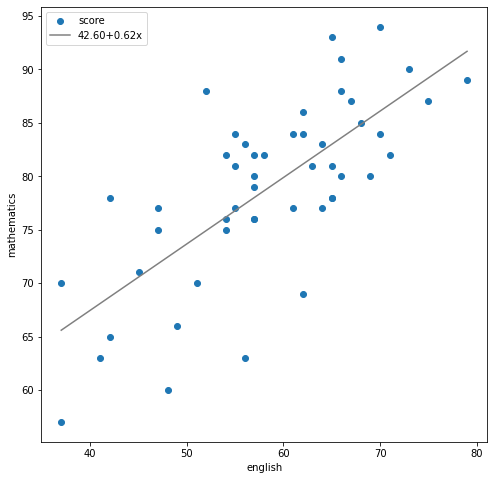

In [25]:
# 계수 B_0과 B_1을 구한다.
poly_fit = np.polyfit(en_scores, ma_scores, 1)
# B_0 + B_1x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(en_scores.min(), en_scores.max())
# xs에 대응하는 y좌표를 구한다.
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(en_scores, ma_scores, label='score')
ax.plot(xs, ys, color='gray', label=f"{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x")

ax.set_xlabel("english")
ax.set_ylabel("mathematics")

#범례 표시
ax.legend(loc="upper left")

plt.show()

## 3.2.3 히트맵
히트맵은 히스토그램의 2차원 버전으로 색을 이용해 표현할 수 있는 그래프다.
hist2 메서드로 작성하며, 인수도 hist 메서드와 거의 동일하다.

색이 진한 영역일수록 많은 학생이 분포되어 있음을 나타낸다.

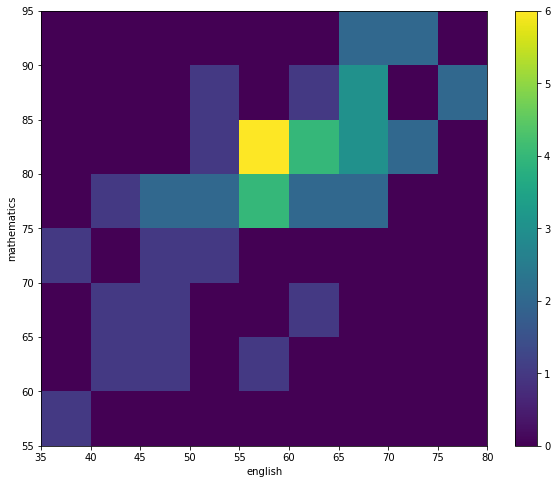

In [33]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

# 영어 점수가 35점부터 80점까지 5점 간격
# 수학 점수가 55점부터 95점까지 5점 간격이 되도록 bins와 range를 지정했다.
c = ax.hist2d(en_scores, ma_scores, bins=[9, 8], range=[(35, 80), (55, 95)])

ax.set_xlabel("english")
ax.set_ylabel("mathematics")
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()